In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [7]:
#Importing file

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)


#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento informazioni sulle stubs che possono contenere candidati muoni 
nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [23]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_bmtf_counts_LS133 = np.bincount(BX_LS133, weights=nBmtfMuons_LS133)
bx_bmtf_counts_LS263 = np.bincount(BX_LS263, weights=nBmtfMuons_LS263)
bx_bmtf_counts_LS264 = np.bincount(BX_LS264, weights=nBmtfMuons_LS264)
bx_bmtf_counts_LS306 = np.bincount(BX_LS306, weights=nBmtfMuons_LS306)

bx_bmtf_counts = bx_bmtf_counts_LS133 + bx_bmtf_counts_LS263 + bx_bmtf_counts_LS264 + bx_bmtf_counts_LS306

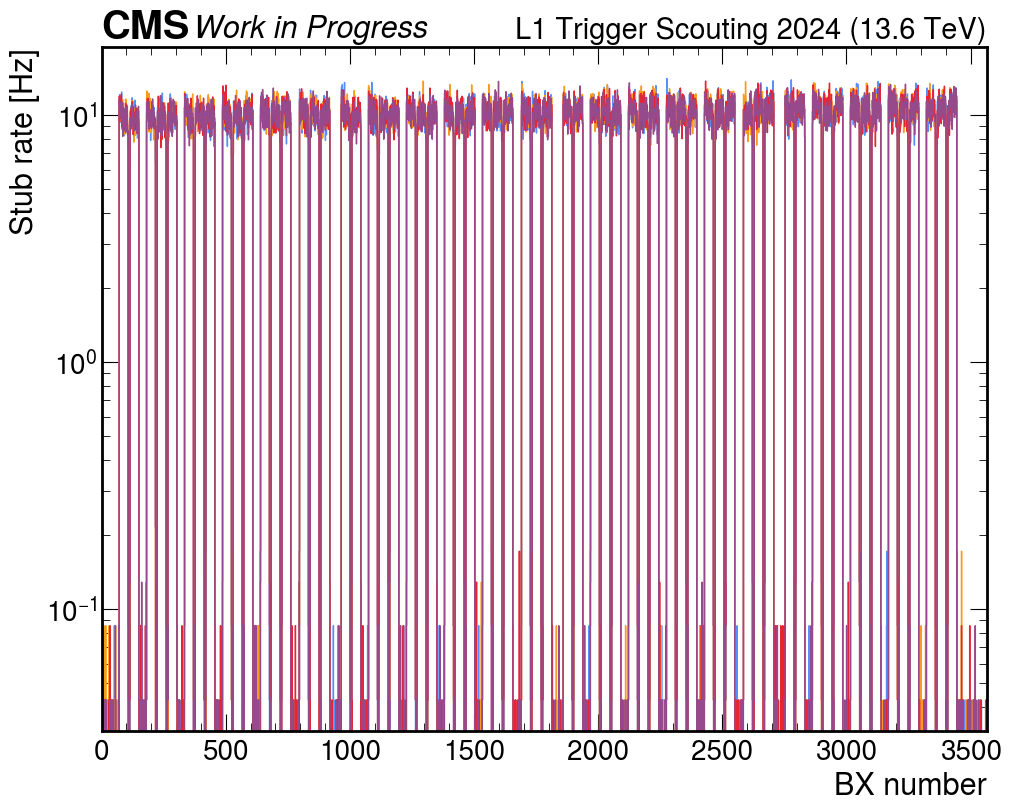

In [22]:
#Plot con tutti e quattro i file separati per verificare inconsistenze
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts_LS133), histtype='step')
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts_LS263), histtype='step')
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts_LS264), histtype='step')
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts_LS306), histtype='step')


ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

plt.show()

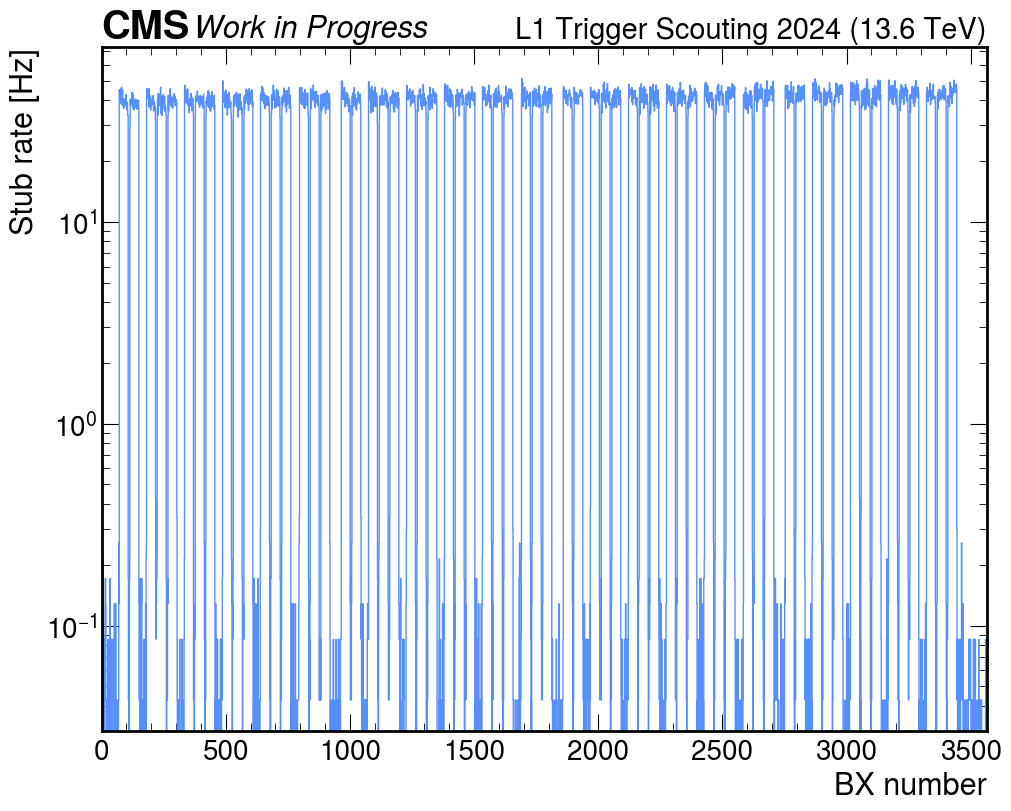

In [24]:
#Plot con i quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

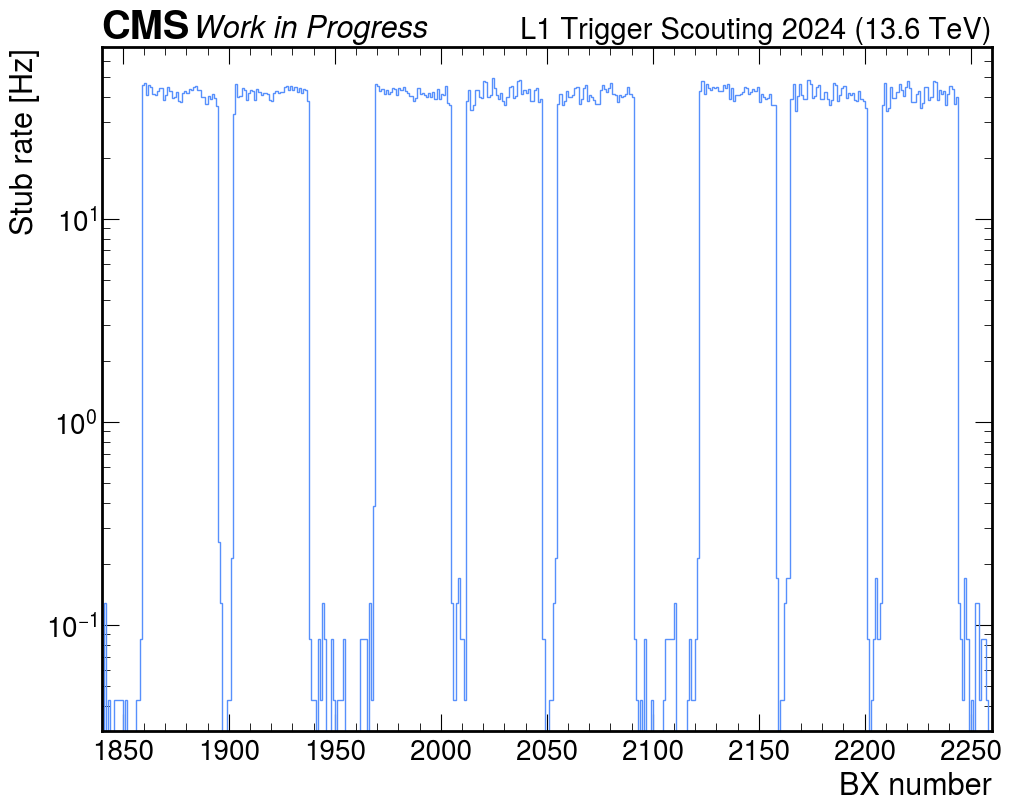

In [25]:
#Zoom dei quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_bmtf_counts[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')

# Molteplicità per bx e per orbit

In [39]:
nBmtfLS133_count = ConvertToHz(np.bincount(nBmtfMuons_LS133))
nBmtfLS263_count = ConvertToHz(np.bincount(nBmtfMuons_LS263))
nBmtfLS264_count = ConvertToHz(np.bincount(nBmtfMuons_LS264))
nBmtfLS306_count = ConvertToHz(np.bincount(nBmtfMuons_LS306))

nBmtf_Array = ak.Array([nBmtfLS133_count, nBmtfLS263_count, nBmtfLS264_count, nBmtfLS306_count])

MaxStubs = max(len(nBmtf_Array[0]), len(nBmtf_Array[1]), len(nBmtf_Array[2]), len(nBmtf_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnBmtfLS133 = ak.fill_none(ak.pad_none(nBmtf_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS263 = ak.fill_none(ak.pad_none(nBmtf_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS264 = ak.fill_none(ak.pad_none(nBmtf_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS306 = ak.fill_none(ak.pad_none(nBmtf_Array[3], MaxStubs, axis = 0, clip=True), 0)

nBmtf = FnBmtfLS133 + FnBmtfLS263 + FnBmtfLS264 + FnBmtfLS306
print(nBmtf[1:])

[8.35e+04, 6.39e+03, 157, 7.62, 0.171, 0.0428]


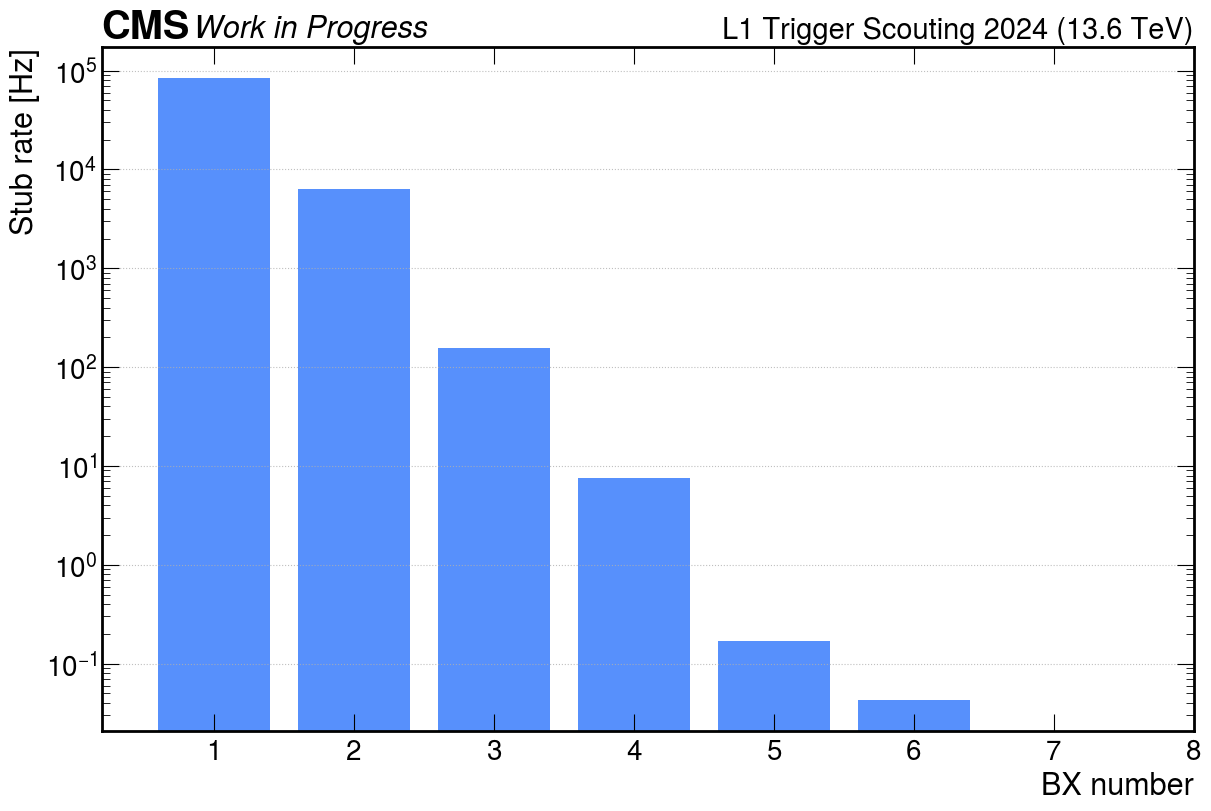

In [47]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nBmtf[1:])), nBmtf[1:])

ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(-0.8, 7)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

[     2 342252  84026  14121   2210    360     55      9      3]
